#**Multi Label Text Classification**

In [ ]:
import pandas as pd 
import numpy as np
import ast 
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.multioutput import MultiOutputClassifier,ClassifierChain

from sklearn.metrics import accuracy_score,hamming_loss,precision_score,recall_score,f1_score,classification_report,jaccard_score
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/stackoverflow.csv',index_col=0)

##**Data Processing**

In [ ]:
df.head()

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"
4,adding scripting functionality to net applicat...,"['c#', '.net']"
5,should i use nested classes in this case i am ...,['c++']
6,homegrown consumption of web services i have b...,['.net']
8,automatically update version number i would li...,['c#']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48976 entries, 2 to 1263454
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    48976 non-null  object
 1   Tags    48976 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df = df.reset_index()

In [ ]:
df.drop(['index'],axis=1)

,Text,Tags
0,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"
1,adding scripting functionality to net applicat...,"['c#', '.net']"
2,should i use nested classes in this case i am ...,['c++']
3,homegrown consumption of web services i have b...,['.net']
4,automatically update version number i would li...,['c#']
...,...,...
48971,using lambda in default initializer gcc vs cla...,['c++']
48972,stl list very bad performance it is supposed t...,['c++']
48973,how to use a dict to subset a dataframe say i ...,['python']
48974,is there a way to use itertools in python to c...,['python']


In [ ]:
df = df.drop([x for x in range(20000,48976)])

In [ ]:
df = df.drop('index',axis=1)

In [ ]:
df

,Text,Tags
0,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"
1,adding scripting functionality to net applicat...,"['c#', '.net']"
2,should i use nested classes in this case i am ...,['c++']
3,homegrown consumption of web services i have b...,['.net']
4,automatically update version number i would li...,['c#']
...,...,...
19995,problem using multibytetowidechar i wanted to ...,['c++']
19996,why are clicks in my expandablelistview ignore...,['android']
19997,possible to limit the countries an ios applica...,['ios']
19998,create table from view i have a view that i wa...,['sql']


### Remove Word No Meaning

In [ ]:
# df['Text'].iloc[1]

In [ ]:
# def clean_longword(text):
#   text_compiler = re.compile(r'\W*\b\w{15,100}\b')
#   long_word = text_compiler.sub('', text)
#   return long_word
# df['Text']= df['Text'].apply(lambda x :clean_longword(x))

In [ ]:
# df['Text'].iloc[1]

### Label Encoder

In [ ]:
df.head(1)

,Text,Tags
0,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"


In [ ]:
df['Tags']  = df['Tags'].apply(lambda x : ast.literal_eval(x))

In [ ]:
type(df['Tags'].iloc[0])

list

In [ ]:
lst = list(df['Tags'])
dct= {}
for i in lst :
  for a in i :
    dct[a]=dct.get(a,0)+1
sorted(dct,reverse=True);

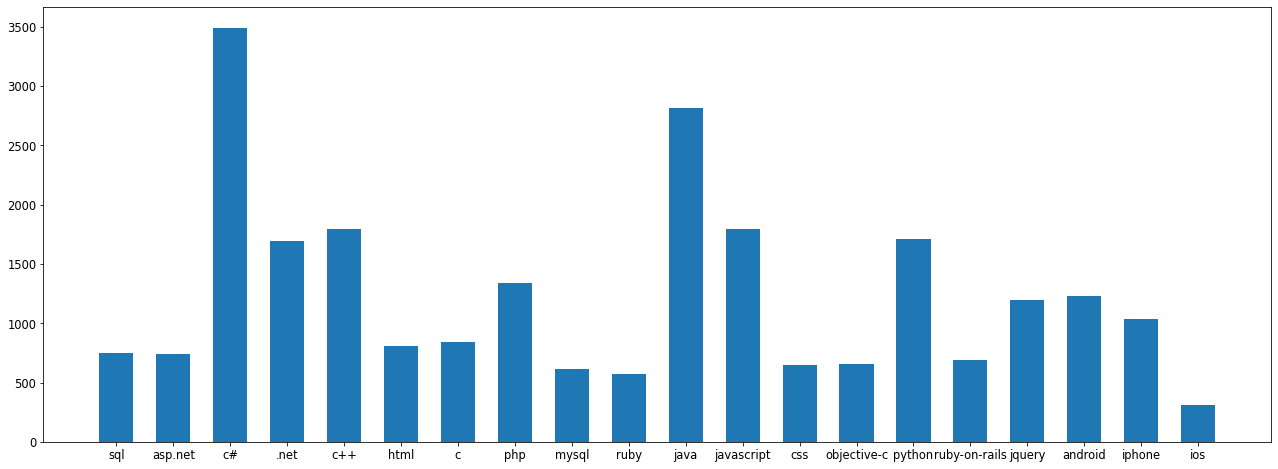

In [ ]:
plt.figure(figsize=(22,8))
plt.bar(dct.keys(),dct.values(),width = 0.6)
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5);


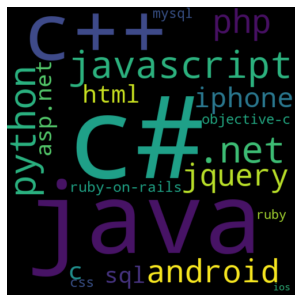

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud(width=500,height=500,margin=1).generate_from_frequencies(dct)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
multi_label = MultiLabelBinarizer()
y = multi_label.fit_transform(df['Tags'])

In [ ]:
print(type(y))
print(y)
print()
print(y[0])
print(len(y[0]))

<class 'numpy.ndarray'>
[[0 0 1 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
20


In [ ]:
print(multi_label.classes_)
print(len(multi_label.classes_))

['.net' 'android' 'asp.net' 'c' 'c#' 'c++' 'css' 'html' 'ios' 'iphone'
 'java' 'javascript' 'jquery' 'mysql' 'objective-c' 'php' 'python' 'ruby'
 'ruby-on-rails' 'sql']
20


In [ ]:
lb_df = pd.DataFrame(y,columns=multi_label.classes_)

In [ ]:
lb_df.head()

,.net,android,asp.net,c,c#,c++,css,html,ios,iphone,java,javascript,jquery,mysql,objective-c,php,python,ruby,ruby-on-rails,sql
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Term Frequency - Inverse Document Frequency

In [ ]:
df.tail(3)

,Text,Tags
19997,possible to limit the countries an ios applica...,[ios]
19998,create table from view i have a view that i wa...,[sql]
19999,simple object validation in java i wonder what...,[java]


In [ ]:
tfidf = TfidfVectorizer(analyzer='word',max_features=7000,ngram_range=(1,2),stop_words='english')
X = tfidf.fit_transform(df['Text'])

In [ ]:
X

<20000x7000 sparse matrix of type '<class 'numpy.float64'>'
	with 682536 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape,y.shape

((20000, 7000), (20000, 20))

##**Train-Test Set**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(y_train.shape)
print(X_train.shape)

(16000, 20)
(16000, 7000)


##**Trainning Models**

In [ ]:
def print_metrics_report(clf,y_test,y_pred):
    print("Clf: ", clf.__class__.__name__)
    print('Accuracy: {0}'.format(np.round(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)*100,2)))
    print('Jaccard score:{0}'.format(np.round(jaccard_score(y_test, y_pred,average='samples',sample_weight=None)*100,2)))
    print('Hamming loss: {0}'.format(np.round(hamming_loss(y_test, y_pred)*100,2))) 
    print('Recall: {0}'.format(np.round(precision_score(y_test, y_pred, average='micro')*100,2)))
    print('Precision: {0}'.format(np.round(recall_score(y_test,y_pred, average='micro')*100,2)))
    print('F1 Measure: {0}'.format(np.round(f1_score(y_test, y_pred, average='micro')*100,2))) 
    print('-------------')
    print("")

###OneVsRestClassifer

In [ ]:

# GSPC = GaussianProcessClassifier(multi_class='one_vs_rest')
LG = LogisticRegression(multi_class='ovr',solver='lbfgs')
SGD = SGDClassifier()
PC = Perceptron()
PAC = PassiveAggressiveClassifier()
LSVC = LinearSVC(C=1)
# DCT = DecisionTreeClassifier()

In [ ]:
for classifier in [LG,SGD,PC,PAC,LSVC]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print_metrics_report(classifier,y_test,y_pred)

Clf:  LogisticRegression
Accuracy: 36.28
Jaccard score:41.57
Hamming loss: 4.0
Recall: 89.43
Precision: 39.94
F1 Measure: 55.22
-------------

Clf:  SGDClassifier
Accuracy: 46.32
Jaccard score:53.29
Hamming loss: 3.39
Recall: 89.13
Precision: 51.33
F1 Measure: 65.14
-------------

Clf:  Perceptron
Accuracy: 42.22
Jaccard score:55.63
Hamming loss: 4.48
Recall: 64.28
Precision: 61.52
F1 Measure: 62.87
-------------

Clf:  PassiveAggressiveClassifier
Accuracy: 43.22
Jaccard score:56.22
Hamming loss: 4.28
Recall: 66.48
Precision: 61.6
F1 Measure: 63.95
-------------

Clf:  LinearSVC
Accuracy: 49.08
Jaccard score:58.1
Hamming loss: 3.35
Recall: 82.32
Precision: 58.12
F1 Measure: 68.13
-------------



In [ ]:
# parameters = {
#     'estimator__n_estimators':[200],
#     'estimator__learning_rate':[0.75,1],
#     'estimator__max_features':[2,3],
#     'estimator__max_depth':[2,3]
# }


In [ ]:
# GDB = GradientBoostingClassifier()
# model = OneVsRestClassifier(GDB)
# model_tuned = GridSearchCV(model,param_grid=parameters,cv=3)
# model_tuned.fit(X_train,y_train)
# print(model_tuned.best_params_)

In [ ]:
# GDB_tuned = GradientBoostingClassifier(
#     learning_rate= 0.75, max_depth= 2, max_features= 2, n_estimators= 200
# )

In [ ]:
# gdb_model = OneVsRestClassifier(GDB_tuned)
# gdb_model.fit(X_train,y_train)
# y_ped = gdb_model.predict(X_test)
# print_metrics_report(GDB_tuned,y_test,y_pred)

###ClassifierChain

In [ ]:
for classifier in [LG,SGD,PC,PAC,LSVC]:
  clf = ClassifierChain(classifier)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print_metrics_report(classifier,y_test,y_pred)

Clf:  LogisticRegression
Accuracy: 44.47
Jaccard score:50.29
Hamming loss: 3.78
Recall: 84.04
Precision: 47.8
F1 Measure: 60.94
-------------

Clf:  SGDClassifier
Accuracy: 53.65
Jaccard score:60.88
Hamming loss: 4.33
Recall: 67.35
Precision: 57.97
F1 Measure: 62.31
-------------

Clf:  Perceptron
Accuracy: 46.58
Jaccard score:57.55
Hamming loss: 4.63
Recall: 63.07
Precision: 60.14
F1 Measure: 61.57
-------------

Clf:  PassiveAggressiveClassifier
Accuracy: 47.28
Jaccard score:58.67
Hamming loss: 4.52
Recall: 63.8
Precision: 61.6
F1 Measure: 62.68
-------------

Clf:  LinearSVC
Accuracy: 54.18
Jaccard score:63.31
Hamming loss: 3.82
Recall: 71.81
Precision: 62.61
F1 Measure: 66.9
-------------



In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.31      0.40       343
           1       1.00      0.85      0.92       250
           2       0.85      0.55      0.66       150
           3       0.69      0.33      0.45       160
           4       0.71      0.51      0.59       724
           5       0.68      0.60      0.63       356
           6       0.94      0.72      0.81       124
           7       0.56      0.42      0.48       138
           8       0.53      0.13      0.21        62
           9       0.81      0.65      0.72       223
          10       0.75      0.78      0.76       541
          11       0.78      0.65      0.71       370
          12       0.84      0.67      0.75       216
          13       0.93      0.73      0.82       126
          14       0.70      0.45      0.55       147
          15       0.83      0.75      0.79       277
          16       0.59      0.87      0.70       328
          17       0.67    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Neural Network

In [ ]:
# MLPClassifier
# MPL = MLPClassifier(hidden_layer_sizes=(100,64,), activation='identity', solver='sgd', max_iter=100, verbose=False)
# MPL.fit(X_train, y_train)

In [ ]:
# y_predict = MPL.predict(X_test)

In [ ]:
# print_metrics_report(clf,y_test,y_predict)

In [ ]:
# print(classification_report(y_test,y_predict))

In [50]:
X_train

<16000x7000 sparse matrix of type '<class 'numpy.float64'>'
	with 543627 stored elements in Compressed Sparse Row format>

####Sequential

In [ ]:
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(666, input_dim=n_inputs, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units=333, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_outputs, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
n_inputs, n_outputs = X_train.toarray().shape[1], y_train.shape[1]

model = get_model(n_inputs, n_outputs)

model.fit(X_train.toarray(), y_train, verbose=2, epochs=10)

yhat = model.predict(X_test.toarray())
yhat

Epoch 1/10
500/500 - 17s - loss: 0.1581 - accuracy: 0.4450 - 17s/epoch - 34ms/step
Epoch 2/10
500/500 - 16s - loss: 0.0658 - accuracy: 0.7325 - 16s/epoch - 33ms/step
Epoch 3/10
500/500 - 17s - loss: 0.0385 - accuracy: 0.8138 - 17s/epoch - 33ms/step
Epoch 4/10
500/500 - 24s - loss: 0.0230 - accuracy: 0.8487 - 24s/epoch - 49ms/step
Epoch 5/10
500/500 - 18s - loss: 0.0127 - accuracy: 0.8670 - 18s/epoch - 36ms/step
Epoch 6/10
500/500 - 16s - loss: 0.0074 - accuracy: 0.8722 - 16s/epoch - 32ms/step
Epoch 7/10
500/500 - 16s - loss: 0.0046 - accuracy: 0.8771 - 16s/epoch - 32ms/step
Epoch 8/10
500/500 - 16s - loss: 0.0034 - accuracy: 0.8776 - 16s/epoch - 32ms/step
Epoch 9/10
500/500 - 16s - loss: 0.0026 - accuracy: 0.8795 - 16s/epoch - 32ms/step
Epoch 10/10
500/500 - 16s - loss: 0.0023 - accuracy: 0.8817 - 16s/epoch - 32ms/step


array([[1.34724379e-03, 3.03619307e-09, 2.21014069e-08, ...,
        2.31840325e-09, 3.07327926e-12, 1.55726765e-10],
       [1.01873588e-11, 1.33448498e-06, 1.32168841e-18, ...,
        1.37459910e-09, 9.43332523e-09, 3.20489885e-11],
       [2.87322346e-05, 3.84747494e-07, 9.65856361e-06, ...,
        2.90989177e-10, 1.73107742e-06, 2.74288814e-09],
       ...,
       [8.47113132e-03, 7.50821073e-07, 1.00000000e+00, ...,
        6.56537980e-09, 1.23535790e-06, 8.15138378e-07],
       [5.10900594e-14, 1.23050986e-10, 9.81018600e-10, ...,
        6.77606238e-07, 4.17862793e-08, 5.82345683e-06],
       [6.09874725e-04, 6.90742236e-05, 9.88128022e-07, ...,
        3.46422195e-04, 8.52862000e-03, 1.18565644e-04]], dtype=float32)

##**Test the Model**


### Neural network

In [ ]:
x = [
     ['analyze data'],
     ['website font end'],
     ['the best programming language for back end website'],
     ['automation'],
     ['if i could change the alphabet, i would put u and i together.'],
]

for i in x :
  xt = tfidf.transform(i)
  yhat = model.predict(xt.toarray())
  yhat_encode = [np.argmax(x) for x in yhat]
  print(f'[{i[0]}],[{multi_label.classes_[yhat_encode[0]]}]',yhat_encode)

[analyze data],[c++] [5]
[website font end],[css] [6]
[the best programming language for back end website],[c] [3]
[automation],[c++] [5]
[if i could change the alphabet, i would put u and i together.],[ios] [8]


### ClassifierChain

In [ ]:
x = [
     ['analyze data'],
     ['website font end'],
     ['the best programming language for back end website'],
     ['automation'],
     ['if i could change the alphabet, i would put u and i together.'],
]

for i,text in enumerate(x) :
  xt = tfidf.transform(text)
  print(x[i],multi_label.inverse_transform(clf.predict(xt)))

['analyze data'] [('sql',)]
['website font end'] [('css',)]
['the best programming language for back end website'] [('sql',)]
['automation'] [()]
['if i could change the alphabet, i would put u and i together.'] [()]


In [ ]:
print(clf.predict(xt))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
